In [2]:
import pandas as pd
import yfinance as yf
start_day = '2022-01-01'
assetList = ['AON','AOS','APA','APD','APH','APTV','ARE','ATO']

In [3]:
def get_One_Asset(company,start_day):
    df = pd.DataFrame()

    returns = yf.Ticker(company)

    data = returns.history(period="1y",start=start_day)

    df.index=data.index

    df[company]=data.Close

    return df

In [4]:
data = pd.DataFrame()
for company in assetList:
    asset = get_One_Asset(company,start_day)
    data = pd.concat([data,asset],axis = 1)

In [5]:
filename = 'myData.csv'
data.to_csv(filename, index=True)

In [6]:
data <- read.csv('myData.csv',header = TRUE)
head(data)

NameError: name 'read' is not defined

In [2]:
tail(data)

,Date,BKNG,BKR,BLK,BMY,BR,BRO,BSX,BWA
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
587,2024-05-03 00:00:00-04:00,3577.38,31.92,763.91,43.99,198.85,83.50,72.85,36.44
588,2024-05-06 00:00:00-04:00,3598.41,32.00,774.64,43.90,200.68,84.21,72.55,36.94
589,2024-05-07 00:00:00-04:00,3605.41,32.14,780.92,44.04,201.36,85.24,73.43,36.80
590,2024-05-08 00:00:00-04:00,3660.00,31.90,778.33,43.67,190.46,84.81,72.72,37.51
591,2024-05-09 00:00:00-04:00,3780.03,32.78,789.13,44.74,193.06,85.61,74.10,37.72
592,2024-05-10 00:00:00-04:00,3805.75,32.34,796.67,44.94,195.69,87.07,73.69,37.50


In [3]:

(nAsset <- dim(data)[2])

[1] 9

In [4]:
(nDays <- dim(data)[1])

[1] 592

In [5]:
Dates <- data[,1]
Dates <- as.Date(Dates, "%Y-%m-%d")
head(Dates)

[1] "2022-01-03" "2022-01-04" "2022-01-05" "2022-01-06" "2022-01-07"
[6] "2022-01-10"

In [6]:
library(fPortfolio)
library(quadprog)
library(xts)

Loading required package: timeDate

Loading required package: timeSeries


Attaching package: ‘timeSeries’


The following objects are masked from ‘package:graphics’:

    lines, points


Loading required package: fBasics

Loading required package: fAssets

Loading required package: zoo


Attaching package: ‘zoo’


The following object is masked from ‘package:timeSeries’:

    time<-


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [7]:
histData <- data[2:nAsset]
sample.xts <- as.xts(histData, order.by = Dates)
head(sample.xts)

               BKNG      BKR      BLK      BMY       BR      BRO   BSX      BWA
2022-01-03 2455.137 23.48789 856.3240 56.62704 173.7221 67.60874 43.12 38.46475
2022-01-04 2458.638 24.00379 861.4803 56.85582 173.3573 67.93307 43.64 40.80602
2022-01-05 2407.140 24.08822 837.5770 56.88326 170.3715 66.29174 43.05 40.84007
2022-01-06 2423.767 24.34148 841.0709 56.75403 167.3090 67.36301 42.59 41.46156
2022-01-07 2428.366 24.50094 838.0466 58.00026 164.6496 67.42199 42.11 41.39346
2022-01-10 2420.207 24.45404 820.2670 60.09576 161.5294 66.91093 42.41 40.90818

In [8]:
 Lag <- 5
 (testData <- sample.xts[(nDays-Lag):nDays,])

              BKNG   BKR    BLK   BMY     BR   BRO   BSX   BWA
2024-05-03 3577.38 31.92 763.91 43.99 198.85 83.50 72.85 36.44
2024-05-06 3598.41 32.00 774.64 43.90 200.68 84.21 72.55 36.94
2024-05-07 3605.41 32.14 780.92 44.04 201.36 85.24 73.43 36.80
2024-05-08 3660.00 31.90 778.33 43.67 190.46 84.81 72.72 37.51
2024-05-09 3780.03 32.78 789.13 44.74 193.06 85.61 74.10 37.72
2024-05-10 3805.75 32.34 796.67 44.94 195.69 87.07 73.69 37.50

In [9]:
 sample.xts <- sample.xts[1:(nDays-Lag),]
 tail(sample.xts)

              BKNG      BKR    BLK   BMY     BR      BRO   BSX   BWA
2024-04-26 3521.08 32.62402 762.88 44.85 194.15 81.33218 73.17 33.19
2024-04-29 3514.80 33.00152 761.28 44.64 196.29 81.41206 72.50 33.73
2024-04-30 3452.03 32.40546 754.64 43.94 193.41 81.41206 71.87 32.77
2024-05-01 3415.64 31.68026 751.58 44.21 193.43 82.57024 72.21 32.87
2024-05-02 3472.91 31.72000 757.00 43.70 195.35 82.72000 72.03 35.63
2024-05-03 3577.38 31.92000 763.91 43.99 198.85 83.50000 72.85 36.44

In [10]:
 nDays <- nDays - Lag

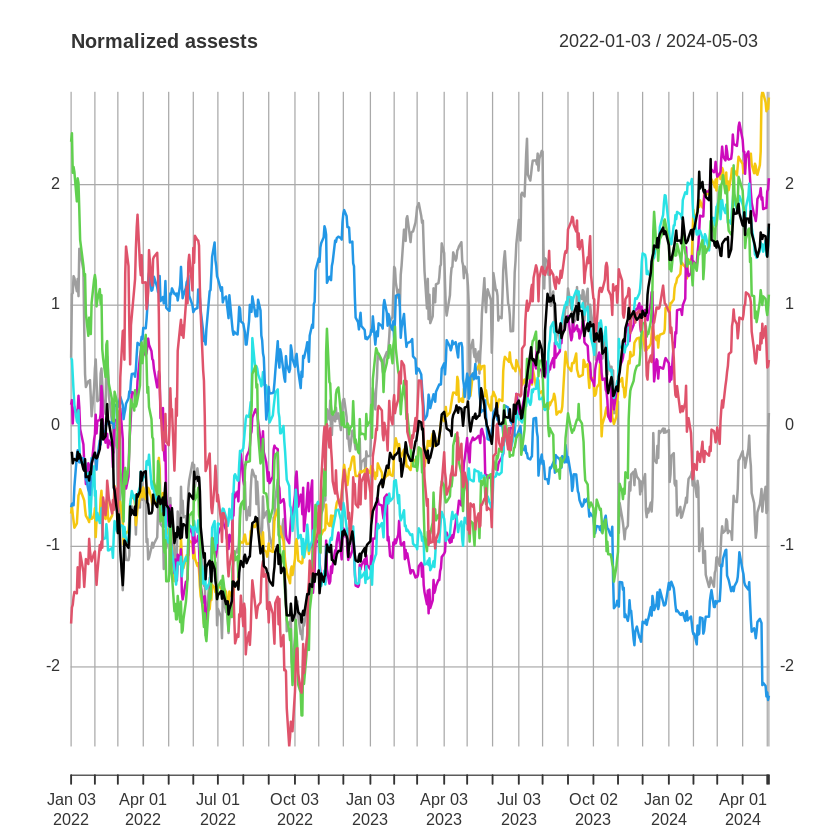

In [11]:
std_data <- scale(sample.xts)
plot(std_data,lty=1,main='Normalized assests',type = "l")

In [12]:
stock.returns <- returns(sample.xts,method = 'discrete')
head(stock.returns)

,BKNG,BKR,BLK,BMY,BR,BRO,BSX,BWA
2022-01-04,NA,NA,NA,NA,NA,NA,NA,NA
2022-01-04,0.001425980,0.021964660,0.006021449,0.0040401662,-0.002100122,0.0047970951,0.01205938,0.0608678465
2022-01-05,-0.020945761,0.003517152,-0.027746728,0.0004826087,-0.017223179,-0.0241609421,-0.01351971,0.0008344354
2022-01-06,0.006907449,0.010513840,0.004171433,-0.0022719216,-0.017975780,0.0161599891,-0.01068523,0.0152177582
2022-01-07,0.001897207,0.006551196,-0.003595763,0.0219584603,-0.015894922,0.0008754837,-0.01127024,-0.0016425765
2022-01-10,-0.003359947,-0.001914282,-0.021215601,0.0361290993,-0.018950415,-0.0075800585,0.00712418,-0.0117236613


In [13]:
stock.returns<-stock.returns[2:nDays,]
head(stock.returns)

,BKNG,BKR,BLK,BMY,BR,BRO,BSX,BWA
2022-01-04,0.001425980,0.021964660,0.006021449,0.0040401662,-0.002100122,0.0047970951,0.01205938,0.0608678465
2022-01-05,-0.020945761,0.003517152,-0.027746728,0.0004826087,-0.017223179,-0.0241609421,-0.01351971,0.0008344354
2022-01-06,0.006907449,0.010513840,0.004171433,-0.0022719216,-0.017975780,0.0161599891,-0.01068523,0.0152177582
2022-01-07,0.001897207,0.006551196,-0.003595763,0.0219584603,-0.015894922,0.0008754837,-0.01127024,-0.0016425765
2022-01-10,-0.003359947,-0.001914282,-0.021215601,0.0361290993,-0.018950415,-0.0075800585,0.00712418,-0.0117236613
2022-01-11,0.017729956,0.034138863,0.017003697,0.0058373433,-0.001842529,0.0039658391,0.02334359,0.0110301046


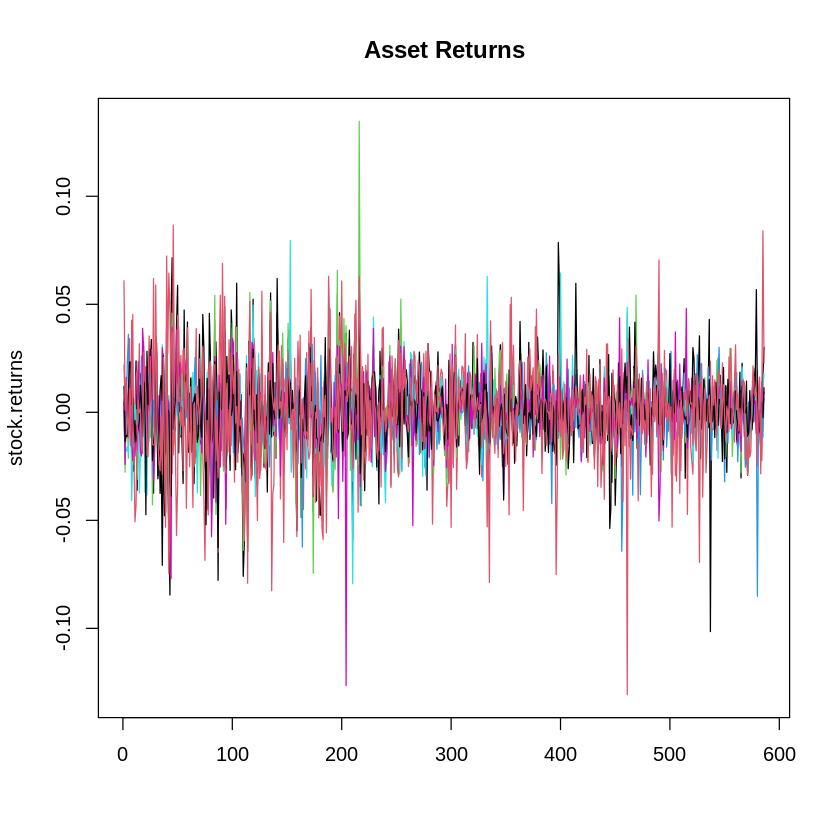

In [14]:
matplot(stock.returns,lty=1,main='Asset Returns',type = "l")

In [15]:
(cov <- cov(stock.returns))

,BKNG,BKR,BLK,BMY,BR,BRO,BSX,BWA
BKNG,4.590174e-04,1.078480e-04,2.113355e-04,2.889948e-05,1.263243e-04,1.167196e-04,1.241856e-04,2.301988e-04
BKR,1.078480e-04,5.000585e-04,1.291195e-04,3.255887e-05,7.088309e-05,7.005097e-05,4.967762e-05,1.434654e-04
BLK,2.113355e-04,1.291195e-04,3.318789e-04,4.736199e-05,1.598500e-04,1.447399e-04,1.183259e-04,2.174385e-04
BMY,2.889948e-05,3.255887e-05,4.736199e-05,1.623864e-04,4.028250e-05,5.500745e-05,4.432034e-05,4.876829e-05
BR,1.263243e-04,7.088309e-05,1.598500e-04,4.028250e-05,2.348481e-04,1.349790e-04,9.782266e-05,1.094180e-04
BRO,1.167196e-04,7.005097e-05,1.447399e-04,5.500745e-05,1.349790e-04,2.661964e-04,1.080952e-04,9.395864e-05
BSX,1.241856e-04,4.967762e-05,1.183259e-04,4.432034e-05,9.782266e-05,1.080952e-04,2.111415e-04,1.080055e-04
BWA,2.301988e-04,1.434654e-04,2.174385e-04,4.876829e-05,1.094180e-04,9.395864e-05,1.080055e-04,4.749065e-04


In [16]:
 n <- ncol(cov)
  Amat <- matrix (1, nrow=n)
  Amat <- cbind(Amat, -diag(n))
  bvec <- 1
  meq <- 1

In [17]:
max.allocation <- 0.45
bvec <- c(bvec, rep(-max.allocation, n))
bvec

[1]  1.00 -0.45 -0.45 -0.45 -0.45 -0.45 -0.45 -0.45 -0.45

In [18]:
  risk.premium.up <-0.5
  risk.increment <- 0.01
  (loops <- risk.premium.up / risk.increment + 1)

[1] 51

In [19]:
  loop <- 1

In [20]:
  eff <- matrix(nrow=loops, ncol=n+3)
  colnames(eff) <- c(colnames(stock.returns), "Std.Dev", "Exp.Return", "sharpe")

In [21]:
mu <- colMeans(stock.returns)

for (i in seq(from=0, to=risk.premium.up, by=risk.increment)){
    dvec <- mu * i
    sol <- solve.QP(cov, dvec=dvec, Amat=Amat, bvec=bvec, meq=meq)
    eff[loop,"Std.Dev"] <- sqrt(sum(sol$solution *colSums((cov * sol$solution))))
    eff[loop,"Exp.Return"] <- as.numeric(sol$solution %*% colMeans(stock.returns))
    eff[loop,"sharpe"] <- eff[loop,"Exp.Return"] / eff[loop,"Std.Dev"]
    eff[loop,1:n] <- sol$solution
    loop <- loop+1
}
eff <- as.data.frame(eff)
head(eff)

,BKNG,BKR,BLK,BMY,BR,BRO,BSX,BWA,Std.Dev,Exp.Return,sharpe
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.04390580,0.1016415,-0.04369862,0.4373743,0.1675892,0.06385287,0.2063358,0.022999152,0.009698555,0.0002652945,0.02735402
2,0.06082103,0.1162930,-0.07931996,0.3893857,0.1671714,0.07255924,0.2571537,0.015935879,0.009748904,0.0003632098,0.03725647
3,0.07773626,0.1309444,-0.11494129,0.3413971,0.1667537,0.08126562,0.3079716,0.008872606,0.009898413,0.0004611250,0.04658575
4,0.09465149,0.1455959,-0.15056263,0.2934085,0.1663360,0.08997199,0.3587895,0.001809333,0.010142699,0.0005590403,0.05511750
5,0.11156672,0.1602473,-0.18618397,0.2454199,0.1659182,0.09867837,0.4096074,-0.005253941,0.010475133,0.0006569555,0.06271572
6,0.12985994,0.1750489,-0.22103681,0.2001882,0.1677012,0.10984099,0.4500000,-0.011602383,0.010851538,0.0007468574,0.06882502


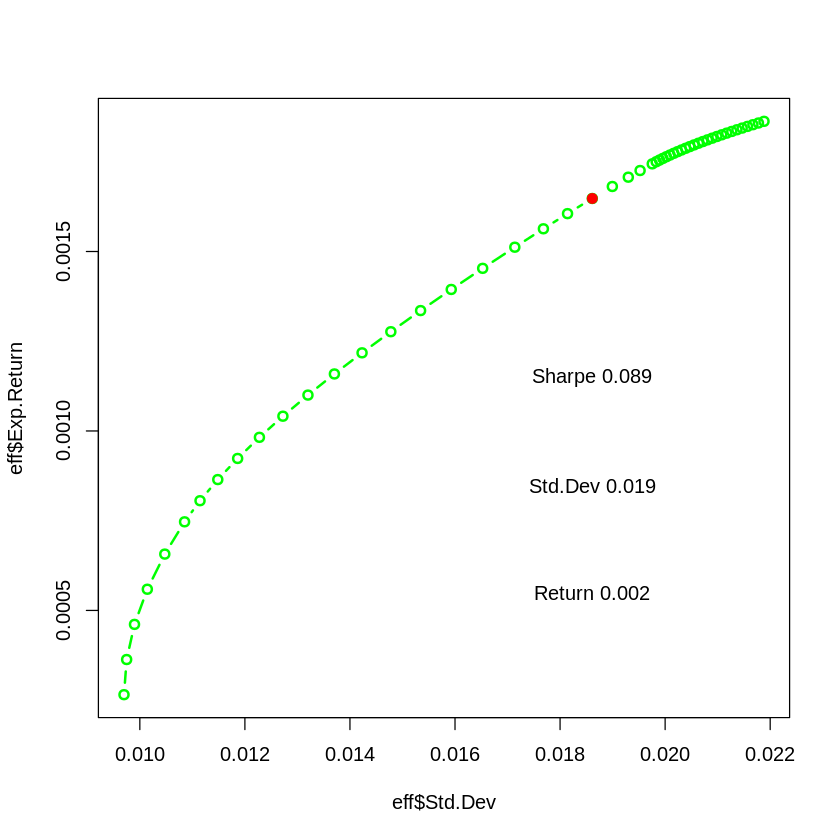

In [22]:
eff.optimal.point <- eff[eff$sharpe==max(eff$sharpe),]

plot(eff$Std.Dev,eff$Exp.Return,type = 'b',pch =21,col = 'green',lwd = 2)
points(eff.optimal.point$Std.Dev,eff.optimal.point$Exp.Return,pch = 20,col = 'red',lwd = 4)
text(eff.optimal.point$Std.Dev,eff.optimal.point$Exp.Return-0.0005,paste('Sharpe',round(eff.optimal.point$sharpe,3)))
text(eff.optimal.point$Std.Dev,eff.optimal.point$Exp.Return-0.0008,paste('Std.Dev',round(eff.optimal.point$Std.Dev,3)))
text(eff.optimal.point$Std.Dev,eff.optimal.point$Exp.Return-0.0011,paste('Return',round(eff.optimal.point$Exp.Return,3)))

In [23]:
eff.optimal.point

,BKNG,BKR,BLK,BMY,BR,BRO,BSX,BWA,Std.Dev,Exp.Return,sharpe
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
22,0.45,0.4235247,-0.7100489,-0.351029,0.3419767,0.4477802,0.45,-0.05220374,0.0186132,0.001647717,0.08852407


In [28]:
   eff.optimal.point<-eff.optimal.point[1:8]
   sabs <- sum(abs(eff.optimal.point))
   norm_eff.optimal.point <- eff.optimal.point/sabs
   sum(abs(norm_eff.optimal.point))

[1] 1

In [29]:
N <- 1000000
(d_money <- norm_eff.optimal.point*N)

,BKNG,BKR,BLK,BMY,BR,BRO,BSX,BWA
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
22,139467.3,131261.9,-220063.5,-108793.5,105987.9,138779.3,139467.3,-16179.36


In [30]:
nData <- dim(sample.xts)[1]
(portfolio <- as.integer (d_money/ histData[nData,]))

[1]    38  4112  -288 -2473   533  1662  1914  -444

In [31]:
sum(abs(portfolio)*histData[nData,])

[1] 996367.1

In [32]:
res <- rep(0,Lag)
for (i in 1 :Lag)
{
  change <- histData[nData+i,]-histData[nData,]
  res[i]<-sum(portfolio*change)
  print(paste(Dates[nData+i],' ',res[i]))
}

[1] "2024-05-06   -380.370693206787"
[1] "2024-05-07   2127.23411941528"
[1] "2024-05-08   -3322.82974624634"
[1] "2024-05-09   4363.82640075684"
[1] "2024-05-10   4007.06402587891"


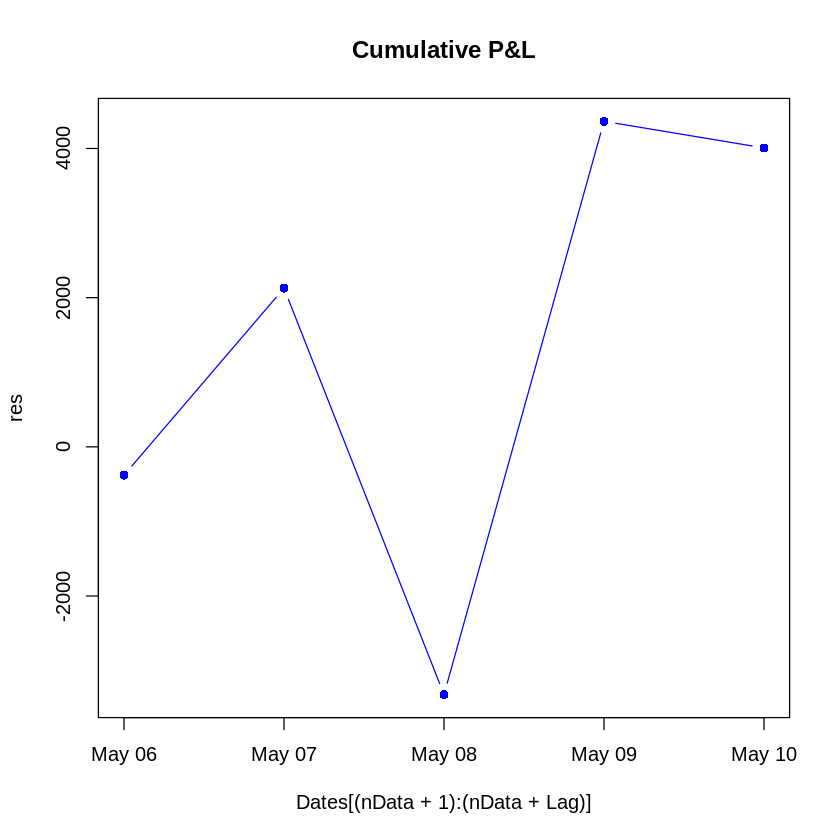

In [33]:
  plot(Dates[(nData+1):(nData+Lag)], res,main='Cumulative P&L',type="b",col = 'blue',pch=16)